In [1]:
import pandas as pd
import numpy as np 
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_data = pd.read_csv("sales_train_validation.csv", encoding='windows-1252')
sales_data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [3]:
sell_data = pd.read_csv("sell_prices.csv", encoding='windows-1252')
sell_data

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [4]:
calendar = pd.read_csv("calendar.csv", encoding='windows-1252')
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [5]:
sales_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [6]:
sell_data.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [7]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


Lets see the data types of the columns present in each dataset

In [8]:
sales_data.dtypes

# As we can see from below id, item_id, dept_id, cat_id, store_id, state_id are categorical values 
# while remaining columns are the number of units sold on each day which is mentioned as 'd_%' where day number, 
# month number and year number are mentioned

id          object
item_id     object
dept_id     object
cat_id      object
store_id    object
             ...  
d_1909       int64
d_1910       int64
d_1911       int64
d_1912       int64
d_1913       int64
Length: 1919, dtype: object

In [9]:
sell_data.dtypes

# We can see from below that store id and item id are keys here that we can use to join on sales data
# and we have selling price of a particular item 

store_id       object
item_id        object
wm_yr_wk        int64
sell_price    float64
dtype: object

In [10]:
calendar.dtypes

# From below we can see that wm_yr_wk is a column on which we can join sell_data. 
# We have date and d, where d is the column name that is mentoined in sales data.
# Events are the events that happen in an year, special occations

date            object
wm_yr_wk         int64
weekday         object
wday             int64
month            int64
year             int64
d               object
event_name_1    object
event_type_1    object
event_name_2    object
event_type_2    object
snap_CA          int64
snap_TX          int64
snap_WI          int64
dtype: object

Lets now see if we have missing values in our datasets

In [11]:
sales_data.isna().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

In [12]:
sell_data.isna().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [13]:
calendar.isna().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

We can see that there are missing values in calendar data but we cannot remove those as an event occurs only once in an year hence the remaining values are missing or null but in other datasets we do not have missing data 

Now we have a understanding of our tables. Lets perform some data exploration to understand how the data looks and lets see if we can identify any findings

### EDA

In [14]:
# Lets check the sales per state
states = sales_data['state_id'].unique()
# Group sales data by state and sum sales for each state
sales_per_state = pd.DataFrame({state: sales_data.groupby("state_id").sum().loc[state] for state in states})
# Display the final result
print(sales_per_state)

           CA     TX     WI
d_1     14195   9438   8998
d_2     13805   9630   8314
d_3     10108   6778   6897
d_4     11047   7381   6984
d_5      9925   5912   3309
...       ...    ...    ...
d_1909  15148   9600  10595
d_1910  14488   9602  10943
d_1911  17095  10615  12807
d_1912  21834  12266  14862
d_1913  23187  12282  14326

[1913 rows x 3 columns]


Text(0.5, 1.0, ' Unit Sales per State ')

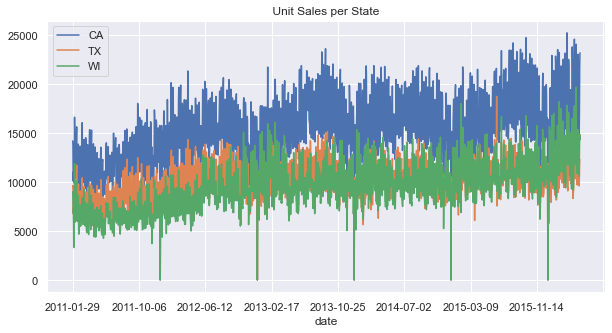

In [15]:
sales_per_state = pd.merge(sales_per_state, calendar.set_index("d")[["date"]], left_index=True, right_index=True, how="left")
sales_per_state.set_index("date", inplace=True)

sns.set()
fig, ax = plt.subplots(figsize=(10,5))
sales_per_state.select_dtypes(object).astype(int)
sales_per_state.plot(kind="line", ax=ax)
ax.set_title(" Unit Sales per State ")

From above we can see that CA has the highest unit sales all across time but TX sales dropped over time while WI sales increased over time

In [16]:
# Now lets look at statewise store sales

In [17]:
state_store_sales = sales_data.groupby(["state_id","store_id"]).sum().loc[:,"d_1":]
state_store_sales = state_store_sales.T
state_store_sales.columns = state_store_sales.columns.get_level_values(1)
state_store_sales

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
d_1,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
d_2,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
d_3,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
d_4,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
d_5,2630,1942,3817,1536,1694,2492,1726,2,1175,2132
...,...,...,...,...,...,...,...,...,...,...
d_1909,3722,3691,5235,2500,2901,3384,3315,3242,4194,3159
d_1910,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226
d_1911,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828
d_1912,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686


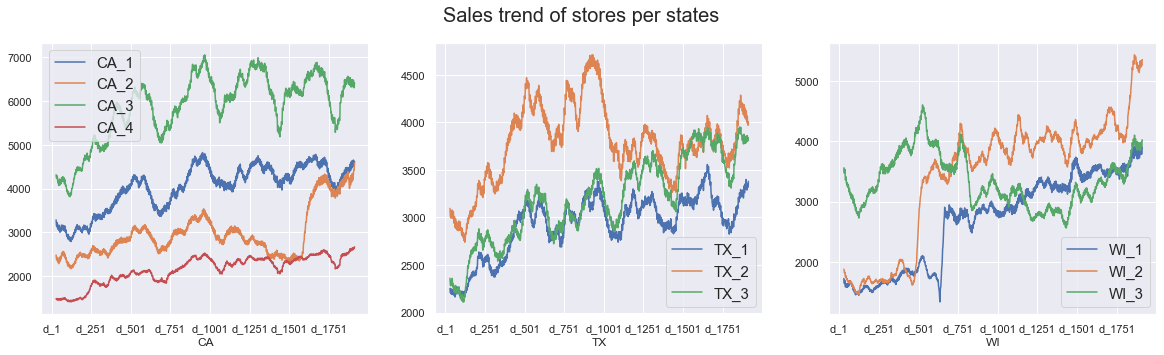

In [18]:
states = sales_data["state_id"].unique()
stores = sales_data["store_id"].unique()
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Sales trend of stores per states", fontsize=20)
for state, ax in zip(states, axes):
    ax.set_xlabel(state)
    cols = [col for col in state_store_sales.columns if state in col]
    state_store_sales[cols].rolling(30).mean().plot(kind="line", ax=ax)
    ax.legend(cols, fontsize=15)

plt.show()

From above we can see that in each state there are shops that performing really well over time and shops that consistently perform the same over time with minimal improvement.

Now let us look at combined sales per item type

In [19]:
sales_data['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

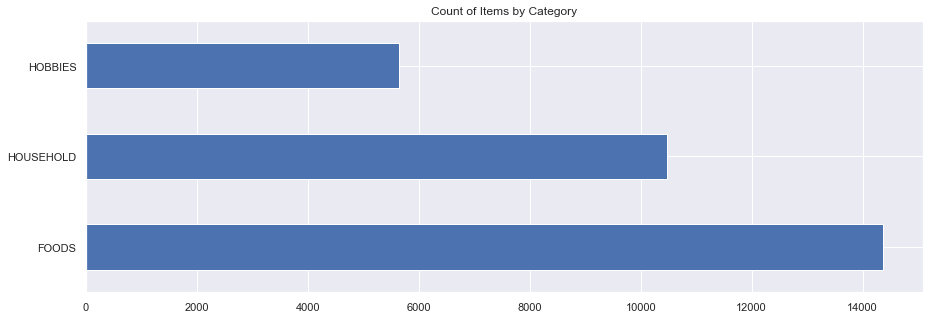

In [20]:
sales_data['cat_id'].value_counts().plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

In [21]:
# Lets check the sales per categories
categories = sales_data['cat_id'].unique()
# Group sales data by state and sum sales for each state
sales_per_cat = pd.DataFrame({category: sales_data.groupby("cat_id").sum().loc[category] for category in categories})
# Display the final result
print(sales_per_cat)

        HOBBIES  HOUSEHOLD  FOODS
d_1        3764       5689  23178
d_2        3357       5634  22758
d_3        2682       3927  17174
d_4        2669       3865  18878
d_5        1814       2729  14603
...         ...        ...    ...
d_1909     3472       8239  23632
d_1910     3353       8363  23317
d_1911     4085       9728  26704
d_1912     4787      12248  31927
d_1913     4683      12458  32654

[1913 rows x 3 columns]


Text(0.5, 1.0, ' Unit Sales per Category ')

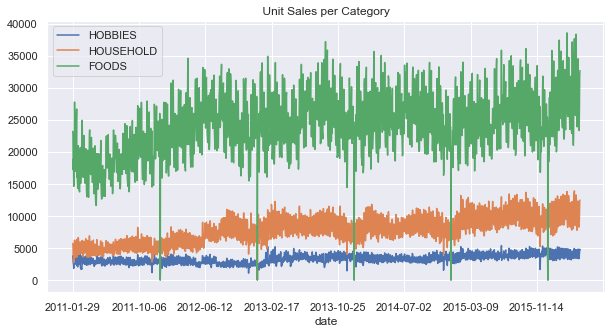

In [22]:
sales_per_cat = pd.merge(sales_per_cat, calendar.set_index("d")[["date"]], left_index=True, right_index=True, how="left")
sales_per_cat.set_index("date", inplace=True)

sns.set()
fig, ax = plt.subplots(figsize=(10,5))
sales_per_cat.select_dtypes(object).astype(int)
sales_per_cat.plot(kind="line", ax=ax)
ax.set_title(" Unit Sales per Category ")

Food has the highest sales after which we have household items then hobbies

In [35]:
sales_state_cat = sales_data.groupby(['state_id', 'cat_id']).sum().T.loc['d_1':]
sales_state_cat.columns = [state + '_' + cat for state, cat in sales_state_cat.columns]

Text(0.5, 1.0, ' Sales trend of different categories in each state ')

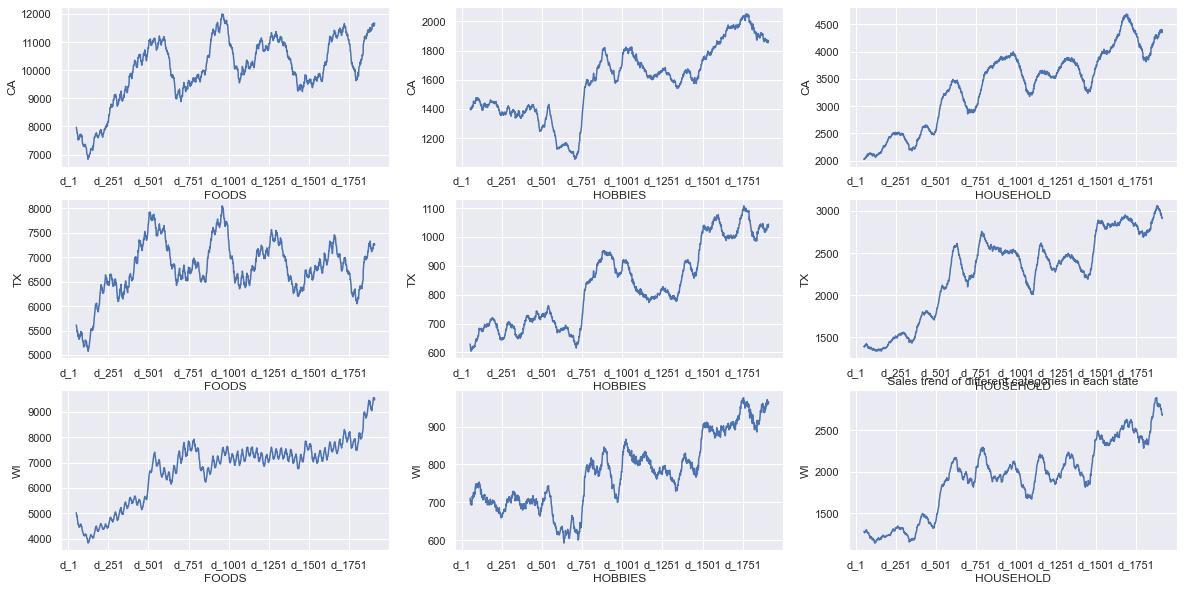

In [52]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for i, state in enumerate(states):
    for j, col in enumerate(sales_state_cat.columns):
        if state in col:
            ax = axes[i][j % 3]
            ax.set_ylabel(state)
            ax.set_xlabel(col.split("_")[1])
            sales_state_cat[col].rolling(50).mean().plot(ax=ax)
ax.set_title(" Sales trend of different categories in each state ")

We can see Sales trend of different categories in each state

In [83]:
# Combine sales data with calendar data
sales_by_day = sales_data.sum().loc["d_1":].to_frame(name="sales")
year_sales = pd.merge(sales_by_day, calendar.set_index("d")[["weekday", "month"]], left_index=True, right_index=True)

# Calculate days sales
days_sales = sales_by_day["sales"].sum()


In [89]:
import calendar

# Group sales by month and weekday
week_month = year_sales.groupby(["month", "weekday"])["sales"].sum().unstack("weekday")

# Rename months from integers to their corresponding names
week_month = week_month.rename(index={i+1: month for i, month in enumerate(calendar.month_abbr[1:])})

# Transpose the dataframe
week_month = week_month.T

# Set index to be categorical with weekdays in order
week_month.index = pd.Categorical(week_month.index, categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

# Sort the index
week_month = week_month.sort_index()
week_month


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Monday,699629,823590,845361,791815,667727,754775,733643,748332,765193,718843,666887,753065
Tuesday,628697,722176,807303,761470,635392,661240,739307,658649,688428,673914,624137,689964
Wednesday,629219,749709,763004,747955,628255,637255,736361,682468,640696,691833,633310,652671
Thursday,675517,734972,806011,718085,667089,643164,722279,698013,639712,700701,578785,661639
Friday,785297,805166,875930,856296,763838,746289,800855,836389,729346,769570,705891,668827
Saturday,997833,1041717,1136936,1044592,859250,902349,826864,984441,905580,936699,880504,867084
Sunday,929319,1012259,1152665,1040798,816546,905140,884666,963438,952934,889029,904110,818722


In [95]:
cat_sum_sales_monthly = (sales_data.groupby(["cat_id"])
                         .sum()
                         .T
                         .loc["d_1":,:]
                         .merge(days[["month"]], right_index=True, left_index=True)
                         .select_dtypes(include=np.number)
                         .groupby(["month"])
                         .sum())

cat_median_sales_monthly = (sales_data.groupby(["cat_id"])
                            .sum()
                            .T
                            .loc["d_1":,:]
                            .merge(days[["month"]], right_index=True, left_index=True)
                            .groupby(["month"])
                            .agg({"FOODS":"median", "HOBBIES":"median", "HOUSEHOLD":"median"}))


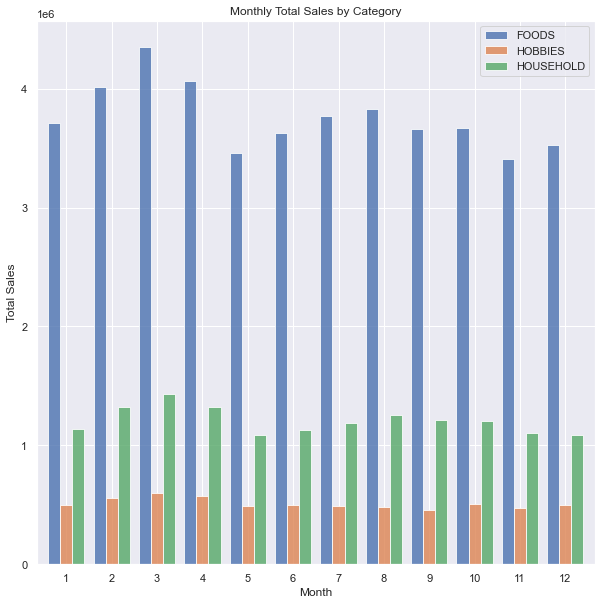

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
cat_sum_sales_monthly.plot.bar(ax=ax, width=0.8, alpha=0.8)
ax.set_xticklabels(cat_sum_sales_monthly.index, rotation=0)
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Monthly Total Sales by Category')
plt.show()


Here we can see the total aggregated sales of categories, monthly comparison and all time trend

In [139]:
price_year_mean = sell_data.merge(calendar[["wm_yr_wk", "year"]], on="wm_yr_wk", how="left").groupby(["item_id", "year"]).mean()
price_year_mean = price_year_mean.drop(columns="wm_yr_wk").reset_index(level=1)
price_dept = price_year_mean.reset_index().merge(sales_data.set_index("item_id")[["dept_id", "store_id", "state_id", "cat_id"]], on="item_id", how="left")


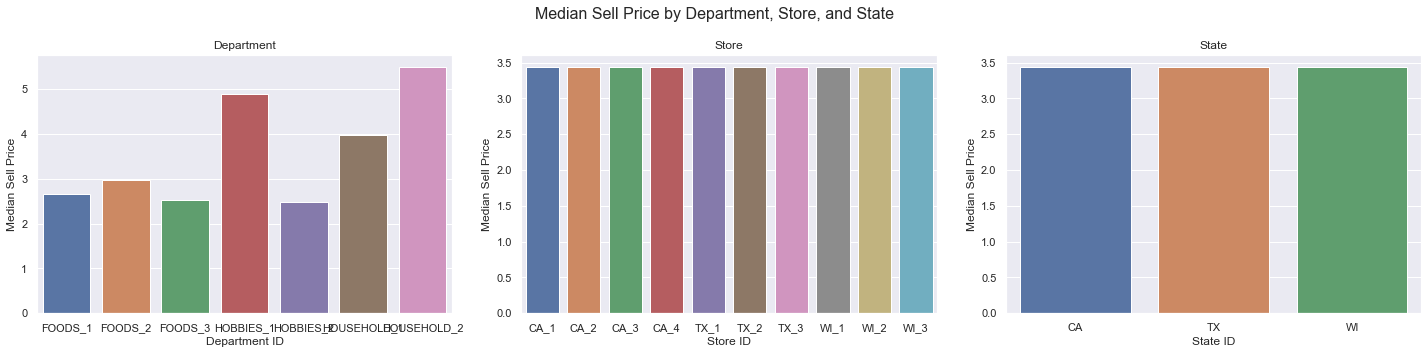

In [128]:
# Aggregate mean sell price by department
dept_median = price_dept.groupby("dept_id")["sell_price"].median().reset_index()

# Aggregate mean sell price by store
store_median = price_dept.groupby("store_id")["sell_price"].median().reset_index()

# Aggregate mean sell price by state
state_median = price_dept.groupby("state_id")["sell_price"].median().reset_index()

# Create subplots for each aggregate
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Median Sell Price by Department, Store, and State", fontsize=16)

# Plot median sell price by department
sns.barplot(x="dept_id", y="sell_price", data=dept_median, ax=axes[0])
axes[0].set_title("Department")
axes[0].set_xlabel("Department ID")
axes[0].set_ylabel("Median Sell Price")

# Plot median sell price by store
sns.barplot(x="store_id", y="sell_price", data=store_median, ax=axes[1])
axes[1].set_title("Store")
axes[1].set_xlabel("Store ID")
axes[1].set_ylabel("Median Sell Price")

# Plot median sell price by state
sns.barplot(x="state_id", y="sell_price", data=state_median, ax=axes[2])
axes[2].set_title("State")
axes[2].set_xlabel("State ID")
axes[2].set_ylabel("Median Sell Price")

# Adjust layout and display plot
fig.tight_layout()
plt.show()


In [140]:
price_dept

,item_id,year,sell_price,dept_id,store_id,state_id,cat_id
0,FOODS_1_001,2011,1.998959,FOODS_1,CA_1,CA,FOODS
1,FOODS_1_001,2011,1.998959,FOODS_1,CA_2,CA,FOODS
2,FOODS_1_001,2011,1.998959,FOODS_1,CA_3,CA,FOODS
3,FOODS_1_001,2011,1.998959,FOODS_1,CA_4,CA,FOODS
4,FOODS_1_001,2011,1.998959,FOODS_1,TX_1,TX,FOODS
...,...,...,...,...,...,...,...
159705,HOUSEHOLD_2_516,2016,5.919737,HOUSEHOLD_2,TX_2,TX,HOUSEHOLD
159706,HOUSEHOLD_2_516,2016,5.919737,HOUSEHOLD_2,TX_3,TX,HOUSEHOLD
159707,HOUSEHOLD_2_516,2016,5.919737,HOUSEHOLD_2,WI_1,WI,HOUSEHOLD
159708,HOUSEHOLD_2_516,2016,5.919737,HOUSEHOLD_2,WI_2,WI,HOUSEHOLD


In [151]:
cat_year_price = price_dept.groupby(['cat_id', 'year', 'sell_price','dept_id']).size().reset_index(name='count')
cat_year_price

,cat_id,year,sell_price,dept_id,count
0,FOODS,2011,0.196467,FOODS_3,10
1,FOODS,2011,0.197523,FOODS_3,10
2,FOODS,2011,0.197784,FOODS_3,10
3,FOODS,2011,0.197925,FOODS_3,10
4,FOODS,2011,0.198785,FOODS_3,10
...,...,...,...,...,...
11350,HOUSEHOLD,2016,20.514187,HOUSEHOLD_1,10
11351,HOUSEHOLD,2016,20.970000,HOUSEHOLD_2,10
11352,HOUSEHOLD,2016,22.069620,HOUSEHOLD_1,10
11353,HOUSEHOLD,2016,25.970000,HOUSEHOLD_2,10


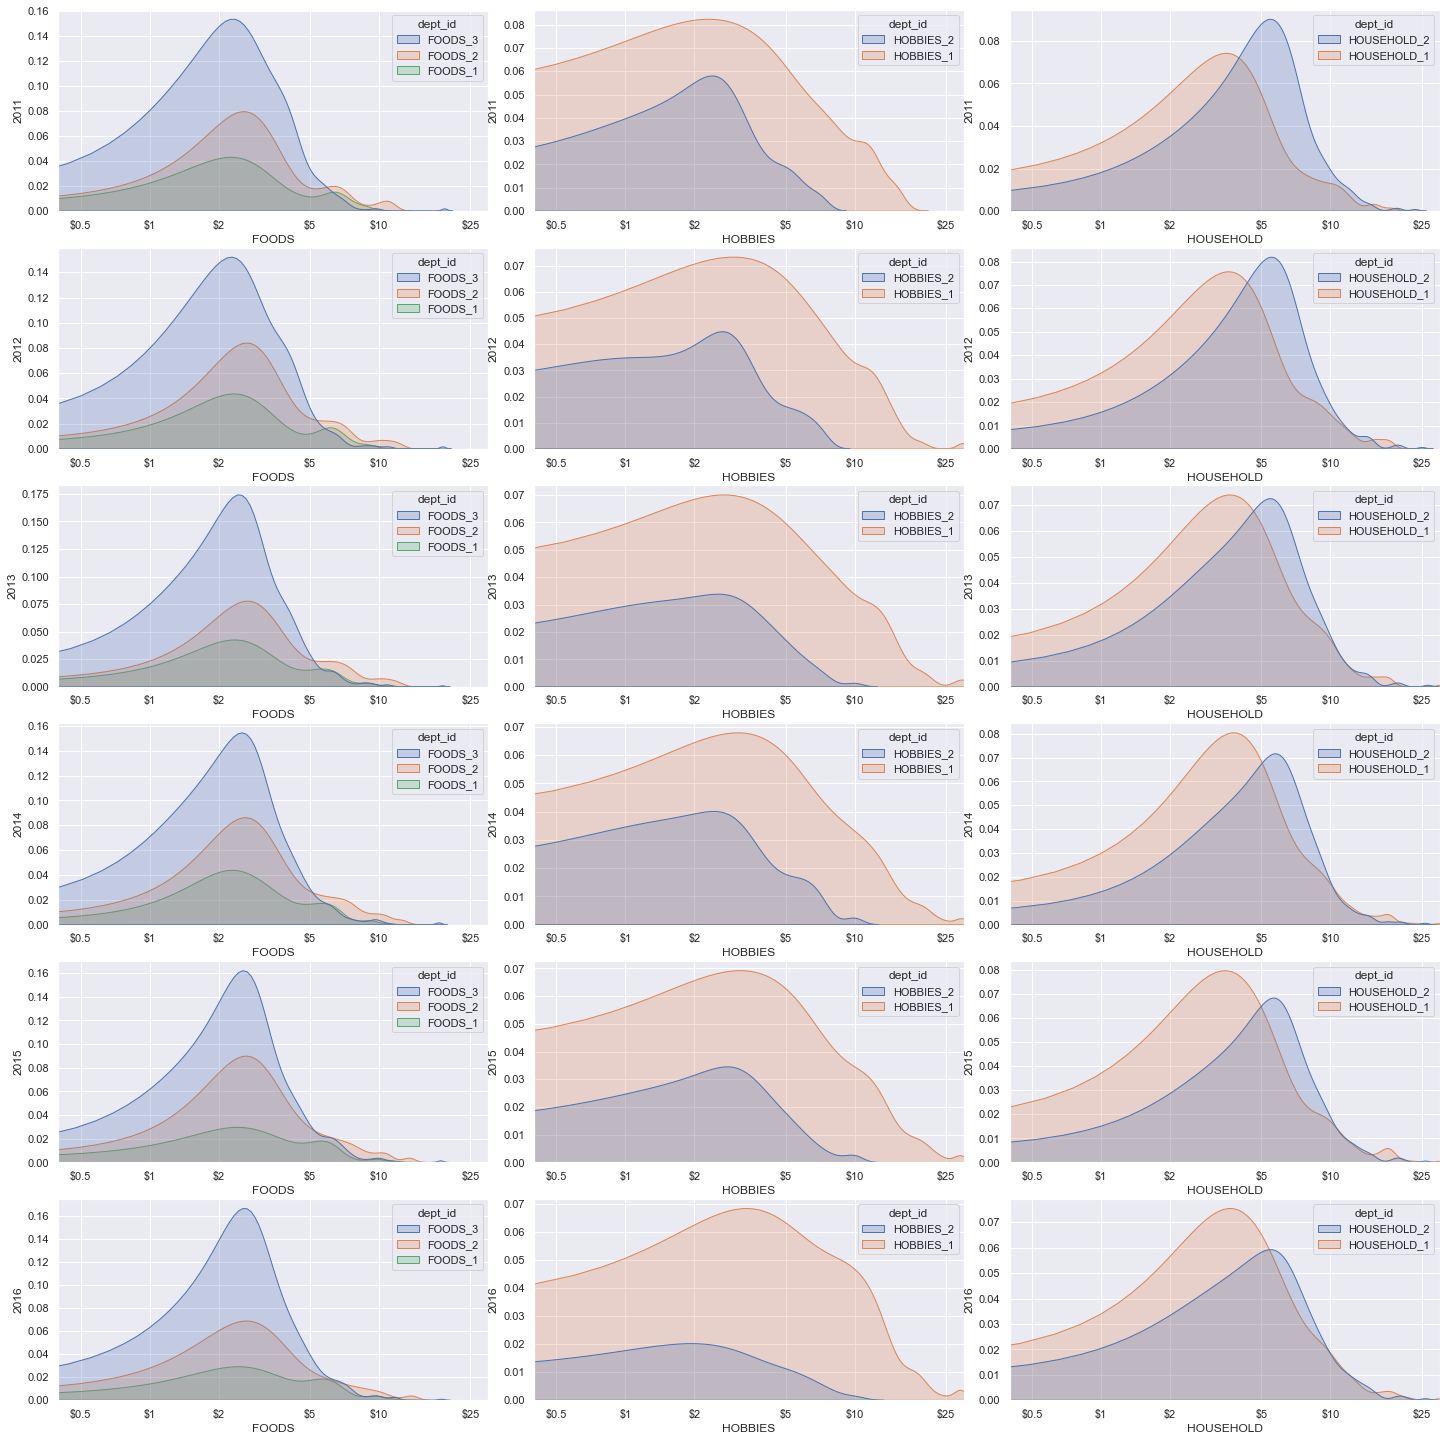

In [154]:
categories = ["FOODS", "HOBBIES", "HOUSEHOLD"]
years = cat_year_price["year"].unique().tolist()
fig, axes = plt.subplots(len(years), len(categories), figsize=(20, 20))
fig.tight_layout()

for y, year in enumerate(years):
    for i, cat in enumerate(categories):
        ax = axes[y][i]
        cat_price = cat_year_price[(cat_year_price["cat_id"] == cat) & (cat_year_price["year"] == year)]
        sns.kdeplot(data=cat_price, x="sell_price", hue="dept_id", ax=ax, shade=True, legend=True)
        ax.set_xscale("log", base=10)
        ax.set_xlim(0.4, 30)
        ax.set_xticks([0.5, 1, 2, 5, 10, 25])
        ax.set_xticklabels(["$0.5", "$1", "$2", "$5", "$10", "$25"])
        ax.set_xlabel(cat)
        ax.set_ylabel(year)


Here we are looking at the distribution of yearly mean item prices in different categories